# Week 4 Assignment: Create a VGG network

In this exercise, you will build a class that implements a [VGG network](https://towardsdatascience.com/vgg-neural-networks-the-next-step-after-alexnet-3f91fa9ffe2c) that can be trained to classify images. The model will look something like this:

<img src='VGG.png'>

It is primarily made up of a series of Conv2D layers followed by a softmax activated layers to classify the image. As you can see, this will be a handful and the code will look huge if you specify each layer individually. As shown in the lectures, you can instead use model subclassing to build complex architectures. You can encapsulate repeating parts of a network then reuse that code when building the final model. You will get to practice that in this exercise. Let's get started!

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import utils

## Create named-variables dynamically

In this assignment, you will see the use of the Python function `vars()`.  This will allow you to use a for loop to define and set multiple variables with a similar name, such as var1, var2, var3.  

Please go through the following examples to get familiar with `vars()`, as you will use it when building the VGG model.
- You'll start by defining a class `MyClass`
- It contains one variable `var1`.  
- Create an object of type `MyClass`.

In [2]:
# Define a small class MyClass
class MyClass:
    def __init__(self):
        # One class variable 'a' is set to 1
        self.var1 = 1

# Create an object of type MyClass()
my_obj = MyClass()

Python classes have an attribute called `__dict__`.
- `__dict__` is a Python dictionary that contains the object's instance variables and values as key value pairs.

In [3]:
my_obj.__dict__

{'var1': 1}

If you call `vars()` and pass in an object, it will call the object's `__dict__` attribute, which is a Python dictionary containing the object's instance variables and their values as ke

In [4]:
vars(my_obj)

{'var1': 1}

You may be familiar with adding new variable like this:

In [5]:
# Add a new instance variable and give it a value
my_obj.var2 = 2

# Calls vars() again to see the object's instance variables
vars(my_obj)

{'var1': 1, 'var2': 2}

Here is another way that you can add an instance variable to an object, using `vars()`.
- Retrieve the Python dictionary `__dict__` of the object using vars(my_obj).
- Modify this `__dict__` dictionary using square bracket notation and passing in the variable's name as a string: `['var3'] = 3`

In [6]:
# Call vars, passing in the object.  Then access the __dict__ dictionary using square brackets
vars(my_obj)['var3'] = 3

# Call vars() to see the object's instance variables
vars(my_obj)

{'var1': 1, 'var2': 2, 'var3': 3}

#### Why this is helpful!
You may be wondering why you would need another way to access an object's instance variables.  
- Notice that when using `vars()`, you can now pass in the name of the variable `var3` as a string.
- What if you plan to use several variables that are similarly named (`var4`, `var5` ... `var9`) and wanted a convenient way to access them by incrementing a number?

Try this!

In [7]:
# Use a for loop to increment the index 'i'
for i in range(4,10):
    # Format a string that is var
    vars(my_obj)[f'var{i}'] = 0
    
# View the object's instance variables!
vars(my_obj)

{'var1': 1,
 'var2': 2,
 'var3': 3,
 'var4': 0,
 'var5': 0,
 'var6': 0,
 'var7': 0,
 'var8': 0,
 'var9': 0}

There are couple equivalent ways in Python to format a string.  Here are two of those ways:
- f-string: f"var{i}"
- .format: "var{}".format(i)

In [8]:
# Format a string using f-string notation
i=1
print(f"var{i}")

# Format a string using .format notation
i=2
print("var{}".format(i))

var1
var2


You can access the variables of a class inside the class definition using `vars(self)`

In [9]:
# Define a small class MyClass
class MyClass:
    def __init__(self):
        # Use vars(self) to access the class's dictionary of variables
        vars(self)['var1'] = 1

# Create an object of type MyClass()
my_obj = MyClass()
vars(my_obj)

{'var1': 1}

You'll see this in the upcoming code.  Now you'll start building the VGG network!

## Create a generic VGG block (TODO)

The VGG Network has blocks of layers, where each block has a varied number of layers.
- In order to create blocks of layers that have a customizable number of conv2D layers, you'll define a class `Block`, which can generate a customizable block of layers 


### `__init__`
In the constructor `__init__`, store the conv2D parameters and also define the number of conv2D layers using the parameters passed into `__init__`.
- Store the filters, kernel_size, and repetitions as class variables so that they can be used later in the `call` function.
- Using a for loop, define a number of Conv2D [Conv2D](https://keras.io/api/layers/convolution_layers/convolution2d/) layers, based on the number of `repetitions` desired for this block.
    - You can define each conv2D layer using `vars` and string formatting to create conv2D_0, conv2D_1, conv2D_3 etc.
    - Set these four parameters of Conv2D:
        - filters
        - kernel_size
        - activation: set this to 'relu'
        - padding: set this to 'same' (default pading is 'valid').
        
- Define the [MaxPool2D](https://keras.io/api/layers/pooling_layers/max_pooling2d/) layer that follows these Conv2D layers. 
    - Set the following parameters for MaxPool2D:
        - pool_size: this will be a tuple with two values.
        - strides: this will also be a tuple with two values.

### `call`
In `call`, you will connect the layers together.
- The 0-th conv2D layer, `conv2D_0`, immediately follows the `inputs`.
- For conv2D layers 1,2 and onward, you can use a for loop to connect conv2D_1 to conv2D_0, and connect conv2D_2 to conv2D_1, and so on.
- After connecting all of the conv2D_i layers, add connect the max_pool layer and return the max_pool layer.

In [10]:
# Please uncomment all lines in this cell and replace those marked with `# YOUR CODE HERE`.
# You can select all lines in this code cell with Ctrl+A (Windows/Linux) or Cmd+A (Mac), then press Ctrl+/ (Windows/Linux) or Cmd+/ (Mac) to uncomment.

class Block(tf.keras.Model):
    def __init__(self, filters, kernel_size, repetitions, pool_size=2, strides=2):
        super(Block, self).__init__()
        self.filters = filters # YOUR CODE HERE
        self.kernel_size = kernel_size # YOUR CODE HERE
        self.repetitions = repetitions # YOUR CODE HERE
        
        # Define a conv2D_0, conv2D_1, etc based on the number of repetitions
        for i in range(self.repetitions):
            
            # Define a Conv2D layer, specifying filters, kernel_size, activation and padding.
            vars(self)[f'conv2D_{i}'] = tf.keras.layers.Conv2D(filters=self.filters, kernel_size=self.kernel_size,
                                                               activation='relu') # YOUR CODE HERE
        
        # Define the max pool layer that will be added after the Conv2D blocks
        self.max_pool = tf.keras.layers.MaxPool2D(pool_size=pool_size, strides=strides) # YOUR CODE HERE
  
    def call(self, inputs):
        # access the class's conv2D_0 layer
        conv2D_0 = self.conv2D_0 # YOUR CODE HERE
        
        # Connect the conv2D_0 layer to inputs
        x = conv2D_0(inputs) # YOUR CODE HERE

        # for the remaining conv2D_i layers from 1 to `repetitions` they will be connected to the previous layer
        for i in range(1,self.repetitions):
            # access conv2D_i by formatting the integer `i`. (hint: check how these were saved using `vars()` earlier)
            conv2D_i = vars(self)[f'conv2D_{i}'] # YOUR CODE HERE
            # Use the conv2D_i and connect it to the previous layer
            x = conv2D_i(x)

        # Finally, add the max_pool layer
        max_pool = self.max_pool(x) # YOUR CODE HERE
        
        return max_pool

    def build_graph(self):
        x = tf.keras.layers.Input(shape=(224,224,1))
        return tf.keras.Model(inputs=[x], outputs=self.call(x))

In [11]:
utils.test_block_class(Block)


ValueError: Exception encountered when calling layer "block" (type Block).

One of the dimensions in the output is <= 0 due to downsampling in conv2d_1. Consider increasing the input size. Received input shape [2, 1, 2, 64] which would produce output shape with a zero or negative value in a dimension.

Call arguments received:
  • inputs=tf.Tensor(shape=(2, 3, 4, 5), dtype=float32)

## Create the Custom VGG network (TODO)
This model stack has a series of VGG blocks, which can be created using the `Block` class that you defined earlier.

### `__init__`
- Recall that the `__init__` constructor of `Block` takes several function parameters, 
    - filters, kernel_size, repetitions: you'll set these.
    - kernel_size and strides: you can use the default values.
- For blocks a through e, build the blocks according to the following specifications:
- block_a: 64  filters, kernel_size 3, repetitions 2
- block_b: 128 filters, kernel_size 3, repetitions 2
- block_c: 256 filters, kernel_size 3, repetitions 3
- block_d: 512 filters, kernel_size 3, repetitions 3
- block_e: 512 filters, kernel_size 3, repetitions 3

After block 'e', add the following layers:
- flatten: use [Flatten](https://keras.io/api/layers/reshaping_layers/flatten/).
- fc: create a fully connected layer using [Dense](https://keras.io/api/layers/core_layers/dense/).  Give this 256 units, and a `'relu'` activation.
- classifier: create the classifier using a Dense layer.  The number of units equals the number of classes.  For multi-class classification, use a `'softmax'` activation.

### `call`
Connect these layers together using the functional API syntax:
- inputs
- block_a
- block_b
- block_c
- block_d
- block_e
- flatten
- fc
- classifier

Return the classifier layer.

In [23]:
# Please uncomment all lines in this cell and replace those marked with `# YOUR CODE HERE`.
# You can select all lines in this code cell with Ctrl+A (Windows/Linux) or Cmd+A (Mac), then press Ctrl+/ (Windows/Linux) or Cmd+/ (Mac) to uncomment.

class MyVGG(tf.keras.Model):

    def __init__(self, num_classes):
        super(MyVGG, self).__init__()

        # Creating blocks of VGG with the following 
        # (filters, kernel_size, repetitions) configurations
        self.block_a = Block(64,3,2) # YOUR CODE HERE #
        self.block_b = Block(128,3,2) # YOUR CODE HERE #
        self.block_c = Block(256,3,3) # YOUR CODE HERE #
        self.block_d = Block(512,3,3) # YOUR CODE HERE #
        self.block_e = Block(512,3,3) # YOUR CODE HERE #

        # Classification head
        # Define a Flatten layer
        self.flatten = tf.keras.layers.Flatten() # YOUR CODE HERE
        # Create a Dense layer with 256 units and ReLU as the activation function
        self.fc = tf.keras.layers.Dense(256, activation='relu') # YOUR CODE HERE
        # Finally add the softmax classifier using a Dense layer
        self.classifier = tf.keras.layers.Dense(num_classes, activation='softmax') # YOUR CODE HERE

    def call(self, inputs):
        # Chain all the layers one after the other
        x = inputs
        list_block = ['a','b','c','d','e']
        for letter in list_block:
            x = vars(self)[f'block_{letter}'](x)
            # for layer in vars(self)[f'block_{letter}'].layers:
            #     print(layer)
            #     x = layer(x)


        # x = self.block_a(x) # YOUR CODE HERE
        # x = self.block_b(x) # YOUR CODE HERE
        # x = self.block_c(x) # YOUR CODE HERE
        # x = self.block_d(x) # YOUR CODE HERE
        # x = self.block_e(x) # YOUR CODE HERE
        x = self.flatten(x) # YOUR CODE HERE
        x = self.fc(x) # YOUR CODE HERE
        x = self.classifier(x) # YOUR CODE HERE
        return x

    def build_graph(self):
        x = tf.keras.layers.Input(shape=(224,224,1))
        return tf.keras.Model(inputs=[x], outputs=self.call(x))

In [24]:
utils.test_myvgg_class(MyVGG, Block)

 All public tests passed


### Load data and train the VGG network (Optional)

If you passed all tests above, then you've successfully built the model for your image classifier. Congratulations! You can submit your work now before proceeding. 

The next steps in the pipeline will be loading the dataset and training your VGG network. The code is shown below but it is only for reference and is **not required to complete the assignment**. Please do not uncomment it because it will cause a grader timeout because of the slow training time. The grader environment does not have an accelerator enabled.

If you want to train with your VGG network, one way is to download your notebook (`File -> Download As -> Notebook`), then upload to [Colab](https://colab.research.google.com). From there, you can use a GPU runtime (`Runtime -> Change Runtime type`) prior to running the cells. Just make sure **to comment out the imports and calls to `utils.py`** so you don't get `File Not Found` errors. Again, this part is only for reference and is not required for grading. For this lab, we will only grade how you built your model using subclassing. You will get to training and evaluating your models in the next courses of this Specialization.

In [ ]:
# For reference only. Please do not uncomment in Coursera Labs because it might cause the grader to time out.
# You can upload your notebook to Colab instead if you want to try the code below.

# Download the dataset
dataset = tfds.load('cats_vs_dogs', split=tfds.Split.TRAIN, data_dir='data/')

# Initialize VGG with the number of classes 
vgg = MyVGG(num_classes=2)

# Compile with losses and metrics
vgg.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define preprocessing function
def preprocess(features):
    # Resize and normalize
    image = tf.image.resize(features['image'], (224, 224))
    return tf.cast(image, tf.float32) / 255., features['label']

# Apply transformations to dataset
dataset = dataset.map(preprocess).batch(32)

# Train the custom VGG model
vgg.fit(dataset, epochs=10)

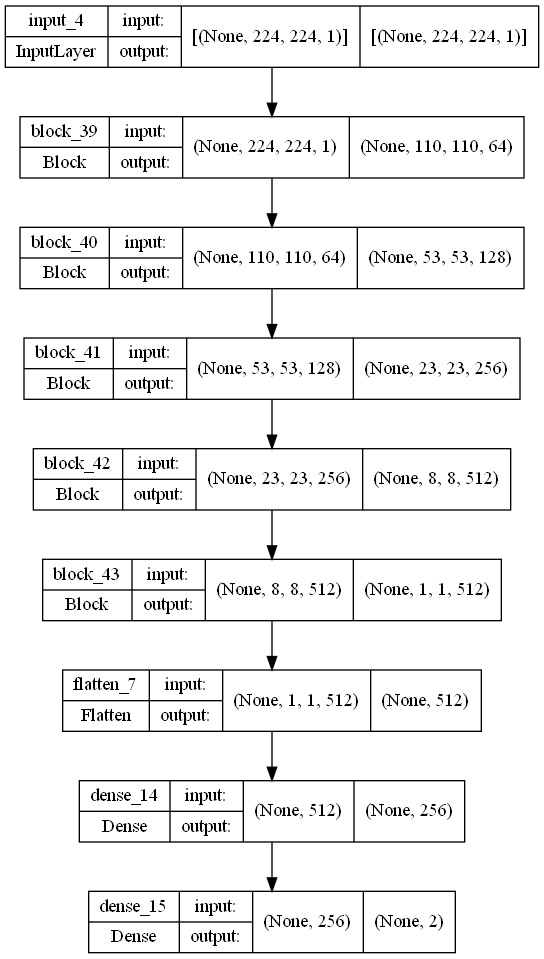

In [25]:
from tensorflow.keras.utils import plot_model
vgg = MyVGG(num_classes=2)
sample_model_block = Block(64,3,3)
plot_model(vgg.build_graph(),to_file='model.png', dpi=96,show_shapes=True, show_layer_names=True, expand_nested=True)

In [26]:
for layer in vgg.block_a.layers:
    print(layer)

In [22]:
vgg.build_graph().summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 1)]     0         
                                                                 
 block_26 (Block)            (None, 112, 112, 64)      0         
                                                                 
 block_27 (Block)            (None, 56, 56, 128)       0         
                                                                 
 block_28 (Block)            (None, 28, 28, 256)       0         
                                                                 
 block_29 (Block)            (None, 14, 14, 512)       0         
                                                                 
 block_30 (Block)            (None, 7, 7, 512)         0         
                                                                 
 flatten_5 (Flatten)         (None, 25088)             0   